In [7]:
import sympy as sy 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 


In [3]:
##2.Versuch

v2_s = [12.49, 12.40, 12.37, 12.41, 12.44] # Zeit in Sekunden
v2_m = [8.81, 8.80, 8.73, 8.83, 8.79]
v2_b = [7.18, 7.12, 7.14, 7.14, 7.14, 7.14]
n=4

## Mittelwert
v2_tmean=[]
v2_tmean.append(np.mean(v2_s))
v2_tmean.append(np.mean(v2_m))
v2_tmean.append(np.mean(v2_b))
                
print(f'meanv2={v2_tmean}')
                
## Standartabweichung
v2_std=[]

v2_std.append(np.std(v2_s, ddof=1))
v2_std.append(np.std(v2_m, ddof=1))
v2_std.append(np.std(v2_b, ddof=1))
                  
print(f'Std={v2_std}')
                
                
## Std des Mittelwert
sigma_t=[]
sigma_t.append(v2_std[0]/(np.sqrt(len(v2_s))))
sigma_t.append(v2_std[1]/(np.sqrt(len(v2_m))))
sigma_t.append(v2_std[2]/(np.sqrt(len(v2_b))))
print(f'SdM={sigma_t}')



## Alpha aus t und n

alpha_t=[]
for i in range(3):
    alpha_t.append((4*np.pi*n)/(v2_tmean[i]**2))
    
print(f'Alpha={alpha_t}')








meanv2=[12.422, 8.792, 7.1433333333333335]
Std=[0.0454972526643095, 0.0376828873628335, 0.01966384160500341]
SdM=[0.02034698994937589, 0.016852299546352697, 0.008027729719194828]
Alpha=[0.3257517860244362, 0.6502711650325247, 0.9850721088398154]


In [4]:
##Trägheitsmoment durch t und phi
## J=M/alpha


m_z = 25.5 * 10**-3
sigma_mz = 2 * 10**-4
g = 9.806
sigma_g = 0.002
rads=[0.0510, 0.1103, 0.1711]
sigma_r=0.0002


J=[]
M=[]
for i in range(3):
    r=rads[i]
    a=alpha_t[i]
    J.append((m_z*g*r)/a)
    M.append(m_z*g*r)
print(f'Trägheitsmoment={J}')
print(f'Drehmoment={M}')





Trägheitsmoment=[0.03914852825716619, 0.04241437631425727, 0.04343242278008422]
Drehmoment=[0.012752702999999997, 0.027580845899999994, 0.0427840683]


In [5]:
## alpha in abhängigkeit von M
## alpha=M/J

alphaM=[]
for i in range(3):
    Mr=M[i]
    Jr=J[i]
    alphaM.append(Mr/Jr)

print(f'Alpha von M={alphaM}')







Alpha von M=[0.3257517860244362, 0.6502711650325247, 0.9850721088398154]


In [14]:
## Lineare Regression

v2_linreg=sp.stats.linregress(M, alphaM)
print(v2_linreg)

m2=v2_linreg.slope
t2=v2_linreg.intercept
x2=np.linspace(min(M), max(M), 501)
y2=m2*x2+t2








LinregressResult(slope=21.954674305684545, intercept=0.0454249484020709, rvalue=0.9999983937934713, pvalue=0.0011410268716392754, stderr=0.03934986196264766, intercept_stderr=0.0011922014635124926)


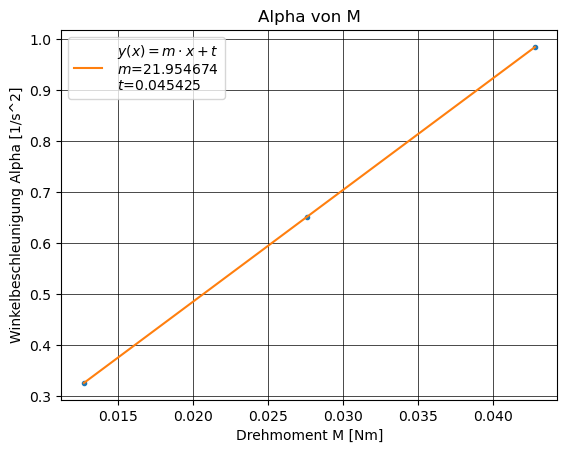

In [18]:

reglabelv2=f' $y(x) = m \\cdot x + t$ \n $m$={m2:.6f} \n $t$={t2:.6f}'

plt.plot(M, alphaM, linestyle='', marker='.')
plt.plot(x2, y2, linestyle='-', label=reglabelv2)
plt.title('Alpha von M')
plt.xlabel('Drehmoment M [Nm]')
plt.ylabel('Winkelbeschleunigung Alpha [1/s^2]')
plt.grid(visible=True, color='black', linewidth=0.5)
plt.legend()



plt.show()

In [9]:
import sympy as sy 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 

d = []
alpha_list = []

mz = 25.5 * 10**-3
g = 9.806
r1 = 0.0510
ms = 296.1*10**-3
L = 92.00*10**-2
m_H = 248.6*10**-3
d = [ 23*10**-2, 44.3*10**-2, 72.2*10**-2 ]
M = mz * g * r1

for i in range(len(d)):
    J = ( 1/12 * ms * L**2 ) + ( 1/2 *m_H * d[i]**2 )
    alpha = M/J
    alpha_list.append(alpha)

print(f"Die Winkelbeschleunigung in Abhängigkeit vom Abstand d : {alpha_list}")


Die Winkelbeschleunigung in Abhängigkeit vom Abstand d : [0.46440356455243337, 0.2816492357846538, 0.14884016601897135]
